<a href="https://colab.research.google.com/github/anamaypandey09/covid/blob/master/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [2]:
covid=pd.read_csv('covid_19_clean_complete.csv',parse_dates=['Date'])
covid.head(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [3]:
covid.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
dtype: object

In [0]:
covid['Active'] = covid['Confirmed']-covid['Recovered']-covid['Deaths'] 
covid

In [0]:
covid[covid['Date'] == covid['Date'].max()]

In [0]:
covid['Country/Region'].value_counts()[:100]

In [7]:
top = covid.groupby('Country/Region')['Confirmed','Deaths','Recovered','Active'].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [0]:
active = covid.groupby('Date')['Active'].sum().reset_index()
active

In [0]:
deaths = covid.groupby('Date')['Deaths'].sum().reset_index()
deaths

In [0]:
confirmed = covid.groupby('Date')['Confirmed'].sum().reset_index()
confirmed

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.xticks(rotation=90,fontsize='14',color='black')
sns.pointplot(confirmed['Date'].dt.date,confirmed['Confirmed'],color='red')
sns.pointplot(active['Date'].dt.date,active['Active'],color='green')
sns.pointplot(deaths['Date'].dt.date,deaths['Deaths'],color='blue')
plt.show()

In [0]:
top_20=top.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).reset_index().head(20)

<function matplotlib.pyplot.show>

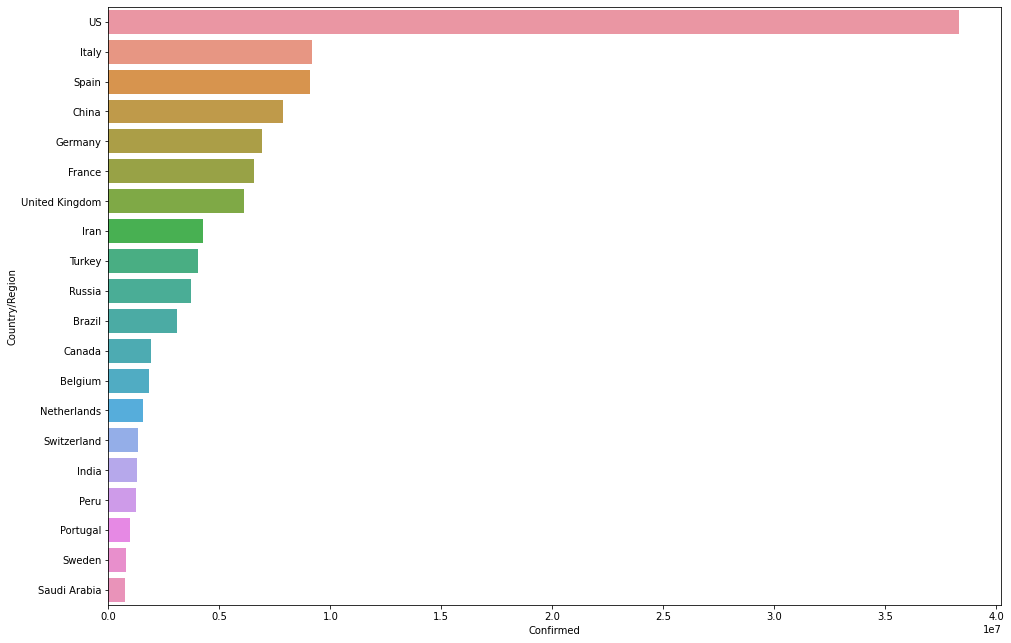

In [15]:
plt.figure(figsize=(16,11))
sns.barplot(top_20['Confirmed'],top_20['Country/Region'])
plt.show

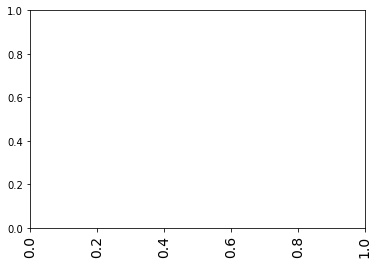

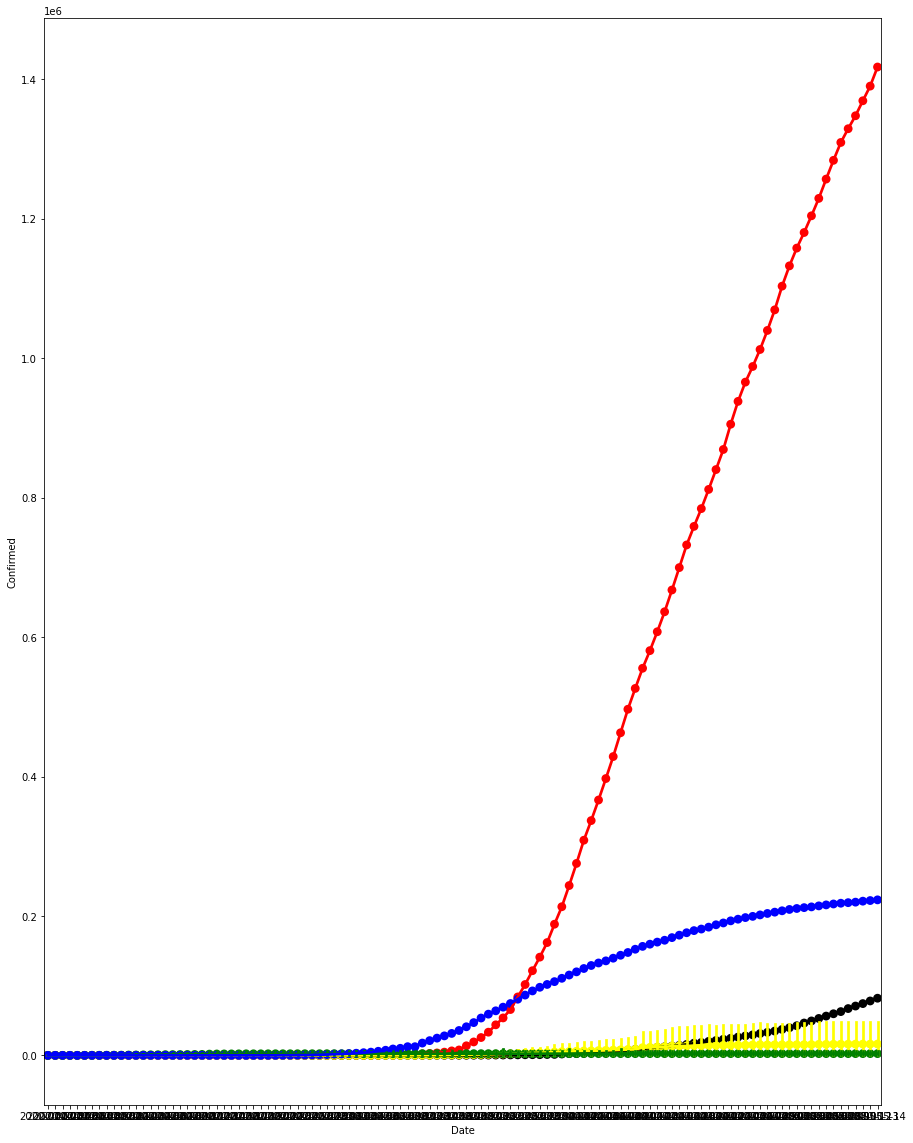

In [30]:
us = covid[covid['Country/Region']=='US']
ind = covid[covid['Country/Region']=='India']
fra = covid[covid['Country/Region']=='France']
china = covid[covid['Country/Region']=='China']
italy = covid[covid['Country/Region']=='Italy']
plt.xticks(rotation=90,fontsize='14',color='black')
plt.figure(figsize=(15,20))
sns.pointplot(us['Date'].dt.date, us['Confirmed'], color='red')
sns.pointplot(ind['Date'].dt.date, ind['Confirmed'], color='black')
sns.pointplot(fra['Date'].dt.date, fra['Confirmed'], color='yellow')
sns.pointplot(china['Date'].dt.date, china['Confirmed'], color='green')
sns.pointplot(italy['Date'].dt.date, italy['Confirmed'], color='blue')
plt.show()